# Exercise 02: Another Transform Pair

In this exercise,
you'll explore the following Fourier transform pair:
\begin{align*}
\text{multiplication} &\Longleftrightarrow \text{convolution}
\end{align*}

Let's install the necessary packages:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn numpy matplotlib ipywidgets ipympl

and import some modules:

In [2]:
%matplotlib widget

import ipywidgets as widgets
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt

As usual, you might want to run this from time to time:

In [3]:
plt.close('all')

The follow code create a plot widget below:

IntSlider(value=1, description='k', max=4, min=1)

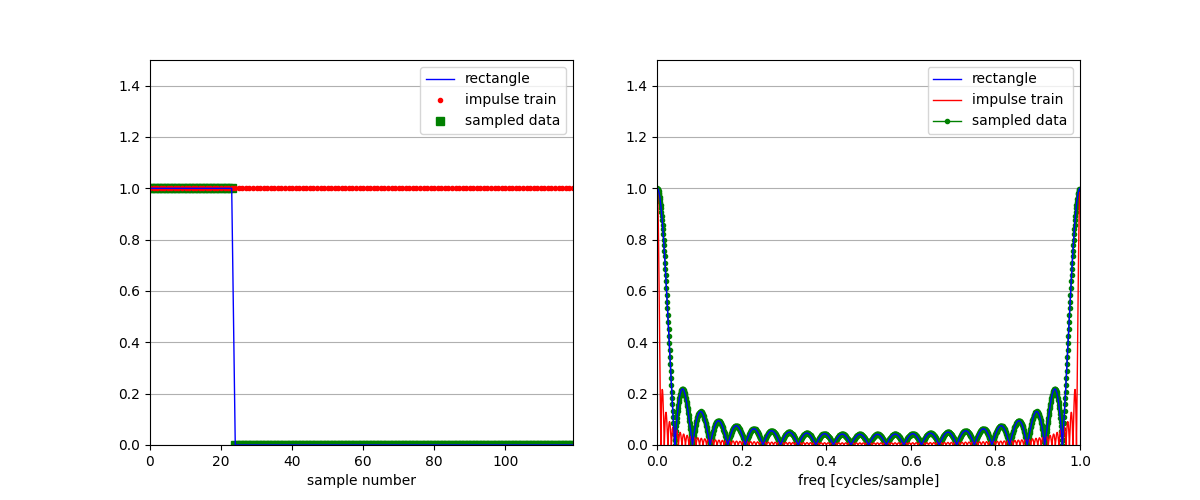

In [4]:
def create_sampling_plot():
    
    def generate_data (spacing__samp):
        res = sklearn.utils.Bunch()

        res.width__samp   = 24
        res.spacing__samp = spacing__samp
        res.N_samps       = 120

        res.impulses_t = np.zeros( (1, res.N_samps) )
        res.impulses_t[0, ::res.spacing__samp] = 1.0

        res.rect_t = np.zeros( (1, res.N_samps) )
        res.rect_t[0, 0:res.width__samp] = 1.0

        res.sampled_t = res.rect_t * res.impulses_t
        
        res.sample_numbers = np.linspace(0, res.N_samps-1, res.N_samps).reshape(1, res.N_samps);
        
        res.N_fft = 10*res.N_samps
            
        res.impulses_f = res.spacing__samp*np.abs(np.fft.fft(res.impulses_t, res.N_fft))/res.N_samps
        res.rect_f     = np.abs(np.fft.fft(res.rect_t, res.N_fft))/res.width__samp
        res.sampled_f  = res.spacing__samp*np.abs(np.fft.fft(res.sampled_t, res.N_fft))/res.width__samp
        
        res.freq_numbers = np.linspace(0, res.N_fft-1, res.N_fft).reshape(1, res.N_fft)/res.N_fft;
        
        return res

    slider_spacing__samp = widgets.IntSlider(min=1, max=4, step=1, value=1, description="k", continuous_update=True)

    fig = plt.figure(figsize=(12,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.resizable       = False
    
    ax_t = fig.add_subplot(1, 2, 1)
    ax_f = fig.add_subplot(1, 2, 2)

    def update_lines(dummy):
        res = generate_data(slider_spacing__samp.value)
        
        ax_t.clear()
        ax_f.clear()

        ax_t.set_xlim(0, res.N_samps-1)
        ax_t.set_ylim(0, +1.5)
        plt.sca(ax_t)
        plt.xlabel(r'sample number')
        plt.grid(visible=True, which='major', axis='y')

        line_sampled_t, = ax_t.plot(np.transpose(res.sample_numbers), np.transpose(res.sampled_t),  color='g', marker='s', linewidth=0.0)
        line_impulse_t, = ax_t.plot(np.transpose(res.sample_numbers), np.transpose(res.impulses_t), color='r', marker='.', linewidth=0.0)
        line_rect_t,    = ax_t.plot(np.transpose(res.sample_numbers), np.transpose(res.rect_t),     color='b', marker='', linewidth=1.0)
        ax_t.legend([line_rect_t, line_impulse_t, line_sampled_t], ['rectangle', 'impulse train', 'sampled data'])
    
        line_sampled_f, = ax_f.plot(np.transpose(res.freq_numbers), np.transpose(res.sampled_f),  color='g', marker='.', linewidth=1.0)
        line_impulse_f, = ax_f.plot(np.transpose(res.freq_numbers), np.transpose(res.impulses_f), color='r', marker='', linewidth=1.0)
        line_rect_f,    = ax_f.plot(np.transpose(res.freq_numbers), np.transpose(res.rect_f),     color='b', marker='', linewidth=1.0)
        ax_f.set_xlim(0, 1.0)
        ax_f.set_ylim(0, +1.5)
        plt.sca(ax_f)
        plt.xlabel(r'freq [cycles/sample]')
        plt.grid(visible=True, which='major', axis='y')
        ax_f.legend([line_rect_f, line_impulse_f, line_sampled_f], ['rectangle', 'impulse train', 'sampled data'])

        fig.canvas.draw_idle()

    update_lines('dummy')
        
    slider_spacing__samp.observe(update_lines, names='value')
    
    display(slider_spacing__samp)
    
create_sampling_plot()

You should already be familiar with impulse trains and rectangle functions from Exercise 01.  If not, make sure you do that before proceeding!

The left plot shows a rectangle function (blue).  We are going to (re)sample it by multiplying it with the impulse train (red) to get a sampled waveform (green).

The green signal is the sample-by-sample product of two signals in the time domain.

**What effect will this have in the frequency domain?**

Multiplying the rectangle function with the impulse train will produce the impulse train within the frequency domain

Let's see if your instincts are correct.

Start increasing $k$ (the space between impulses) and note what happens in the frequency domain.

**What happens to the original rectangle's spectrum?**

Nothing happens to the original rectangle's spectrum

**What happens to the impulse train spectrum?**

As the period increases, the impulse train spectrum in the freq domain decreases.

**What happens to the sampled data spectrum?**

As k increases, the sampled data spectrum produces multiple spikes

**Give a one-sentence explanation of what just happened.**

YOUR ANSWER HERE

**What would happen in the frequency domain if we periodically replicated the rectangle in the time domain?**

YOUR ANSWER HERE

**What did you think of the last two weeks' exercises?**

I found them really tough. I'll definitely need to take a deeper dive into them to wrap my head around these ideas better.